<a href="https://colab.research.google.com/github/sinchan-s/time-series-analysis/blob/main/tsa_darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries for TSA using Darts

In [ ]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Checking one of the dataset for TSA: Air Passengers dataset

In [ ]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

## Loading & Plotting both the datasets: Air Passengers & Monthly Milk datasets

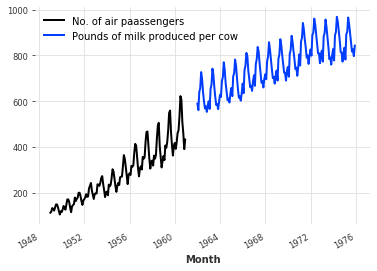

In [ ]:
data_air = AirPassengersDataset().load()
data_milk = MonthlyMilkDataset().load()

data_air.plot(label='No. of air paassengers')
data_milk.plot(label='Pounds of milk produced per cow')
plt.legend()

## Scaling & Plotting the data in range: 0 to 1

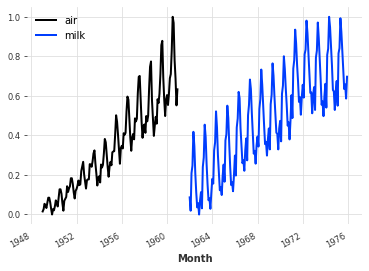

In [ ]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(data_air)
series_milk_scaled = scaler_milk.fit_transform(data_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend()

## Separating Train & Validaton data

In [ ]:
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

## Importing different models for prediction

In [ ]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

## Utilizing NBEATS Model for prediction

In [ ]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### NBEATS model fitting

In [ ]:
model_air_milk.fit([train_air, train_milk], verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


## Prediction & MAPE checking of monthly milk dataset

Predicting: 7it [00:00, ?it/s]

MAPE =  7.16%


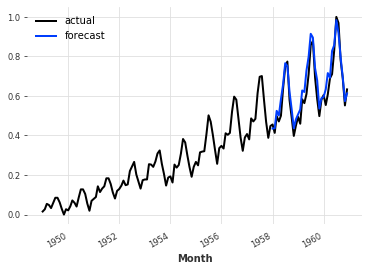

In [ ]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print(f'MAPE = {mape(series_air_scaled, pred): .2f}%')

## Prediction & MAPE checking of air passengers dataset

Predicting: 7it [00:00, ?it/s]

MAPE =  13.34%


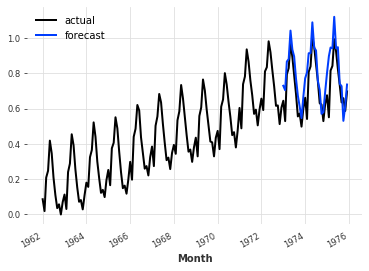

In [ ]:
pred2 = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred2.plot(label='forecast')
plt.legend();
print(f'MAPE = {mape(series_milk_scaled, pred2): .2f}%')